In [5]:
from sklearn.linear_model import RANSACRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/x_train.csv'
x_train = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/y_train.csv'
y_train = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/x_test.csv'
x_test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/y_test.csv'
y_test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/Submission%20Test.csv'
submission_test = pd.read_csv(url)

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [6]:
param_grid = {'min_samples': [20000, 50000, 100000], 'loss': ['squared_error', 'absolute_error']}
grid = GridSearchCV(RANSACRegressor(), param_grid, refit=True, verbose=2)
grid.fit(x_train.to_numpy(), y_train.to_numpy().ravel())
print(grid.best_estimator_)
grid_predictions = grid.predict(x_test.to_numpy())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............loss=squared_error, min_samples=20000; total time=   7.6s
[CV] END ..............loss=squared_error, min_samples=20000; total time=   7.3s
[CV] END ..............loss=squared_error, min_samples=20000; total time=   7.7s
[CV] END ..............loss=squared_error, min_samples=20000; total time=   7.6s
[CV] END ..............loss=squared_error, min_samples=20000; total time=   7.8s
[CV] END ..............loss=squared_error, min_samples=50000; total time=  11.2s
[CV] END ..............loss=squared_error, min_samples=50000; total time=  11.6s
[CV] END ..............loss=squared_error, min_samples=50000; total time=  15.1s
[CV] END ..............loss=squared_error, min_samples=50000; total time=  11.0s
[CV] END ..............loss=squared_error, min_samples=50000; total time=  12.4s
[CV] END .............loss=squared_error, min_samples=100000; total time=  16.9s
[CV] END .............loss=squared_error, min_sam

In [33]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
y_pred = grid.predict(submission_test)
weekly_sales = np.round(y_pred**3, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RANSACRegressor was fitted without feature names
  warnings.warn(


In [34]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
RANSAC_submission = pd.DataFrame(data=sub)
RANSAC_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,11939.03
1,1_1_2012-11-09,11958.16
2,1_1_2012-11-16,11977.32
3,1_1_2012-11-23,11996.50
4,1_1_2012-11-30,12015.69
...,...,...
115059,45_98_2013-06-28,4075.06
115060,45_98_2013-07-05,4084.41
115061,45_98_2013-07-12,4093.77
115062,45_98_2013-07-19,4112.54


In [109]:
RSR = RANSACRegressor(loss='squared_error', min_samples=1000).fit(x_train,y_train)
train_score = RSR.score(x_train, y_train)
test_score = RSR.score(x_test, y_test)
test_score

0.01489715891557708

In [63]:
reg = RANSACRegressor().fit(x_train,y_train)

In [110]:
y_pred = RSR.predict(x_test)

In [111]:
from sklearn.model_selection import learning_curve

train_size = [1, 25, 50, 100, 500, 2500, 7500, 15000]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RSR,
X = x_train,
y = y_train, train_sizes = train_size, cv = 5,
scoring = 'neg_mean_absolute_error')

In [112]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [-8.13447892 -8.09254407 -8.13867555 -8.11681902 -8.09656209]
 [-8.18982083 -8.09352905 -8.09592306 -8.12802629 -8.06993636]
 [-8.08649098 -8.01925172 -8.04467418 -8.04329328 -8.03348248]]

 ----------------------------------------------------------------------

Validation scores:

 [[        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [-8.11301045 -8.11250214 -8.19861974 -8.06859375 -8.10363738]
 [-

In [113]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1             NaN
25            NaN
50            NaN
100           NaN
500           NaN
2500    -8.115816
7500    -8.115447
15000   -8.045439
dtype: float64

 --------------------

Mean validation scores

 1             NaN
25            NaN
50            NaN
100           NaN
500           NaN
2500    -8.119273
7500    -8.107879
15000   -8.083949
dtype: float64


In [114]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


Mean training scores

 1             NaN
25            NaN
50            NaN
100           NaN
500           NaN
2500     8.115816
7500     8.115447
15000    8.045439
dtype: float64

 --------------------

Mean validation scores

 1             NaN
25            NaN
50            NaN
100           NaN
500           NaN
2500     8.119273
7500     8.107879
15000    8.083949
dtype: float64


In [115]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print('Mean Abs Error:', mean_absolute_error(y_test, y_pred))

Mean squared error: 97.24
Coefficient of determination: 0.01
Mean Abs Error: 8.058413186368151


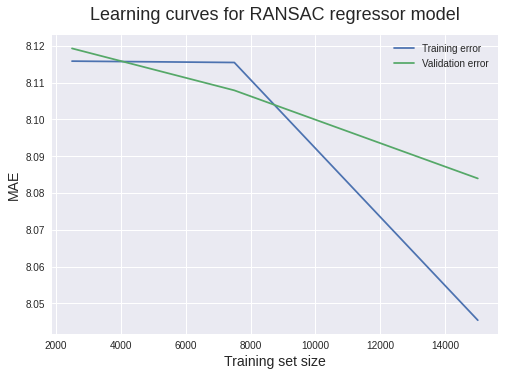

In [119]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for RANSAC regressor model', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
from google.colab import drive
drive.mount('drive')
RANSAC_submission.to_csv('RANSAC_submission.csv')
!cp RANSAC_submission.csv "drive/My Drive/"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
